### __Natural Language Processing with Disaster Tweets__
#### _Predict which Tweets are about real disasters and which ones are not_
> - https://www.kaggle.com/competitions/nlp-getting-started/overview/description

In [1]:
# import libraries
import numpy as np
import pandas as pd
from datetime import datetime, timezone, timedelta
import datetime as dt
import time
import random
from collections import Counter
from PIL import Image
import random
import string
from joblib import Parallel, delayed
import math

import warnings
warnings.filterwarnings('ignore')

# import packages for sentiment analysis
from textblob import TextBlob
from wordcloud import WordCloud

# import regex
import re

# import nltk
import nltk 
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
#plt.imshow(mpimg.imread('jan_aug_tempanom.png'))

# import seaborn
import seaborn as sns

# import scipy.cluster.hierarchy
import scipy
import scipy.linalg as la
import scipy.cluster.hierarchy as sch
from scipy.cluster.vq import whiten, kmeans, vq
from scipy.stats import multivariate_normal
from pathlib import Path

# import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import sklearn.model_selection as model_selection
import sklearn.model_selection as cross_validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import average_precision_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_precision_recall_curve, plot_confusion_matrix
from sklearn.feature_selection import RFE
from sklearn import linear_model, datasets
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import BernoulliNB # Bernoulli because we have binary features
from sklearn.pipeline import Pipeline

# For converting words into frequency counts
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.preprocessing import MinMaxScaler

#for showing 2D plot
%matplotlib inline    

# to be able to see multiple ouputs from sungle cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### __Import Data__

In [2]:
# import train data
test_df = pd.read_csv('../data/test.csv')
test_df.info()
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [3]:
# import train data
train_df = pd.read_csv('../data/train.csv')
train_df.info()
train_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
# check for missing data
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

#### __Check the Proportion of Target Class__

In [5]:
# checking balance of target class
train_df['target'].value_counts()                 # in numbers
train_df['target'].value_counts()/len(train_df)   # in %

# print each target class proportion in %
perc_0 = (train_df['target'].value_counts()/len(train_df))[0]
perc_1 = (train_df['target'].value_counts()/len(train_df))[1]

print(f"\ntarget class 0 = {round(perc_0*100, 2)} % | target class 1 = {round(perc_1*100, 2)} %")

0    4342
1    3271
Name: target, dtype: int64

0    0.57034
1    0.42966
Name: target, dtype: float64


target class 0 = 57.03 % | target class 1 = 42.97 %


__Matplotlib Bar Plot:__
> - https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html
> - https://python-graph-gallery.com/3-control-color-of-barplots
> - https://moonbooks.org/Articles/How-to-plot-a-bar-chart-with-a-colorbar-using-matplotlib-in-python-/
> - https://matplotlib.org/stable/gallery/color/colormap_reference.html
> - https://pythonguides.com/matplotlib-bar-chart-labels/

<Figure size 720x720 with 0 Axes>

Text(0, 0.5, '%')

Text(0.5, 1.0, 'Target Class Balance')

[Text(0, 0, '57.03'), Text(0, 0, '42.97')]

<Figure size 720x720 with 0 Axes>

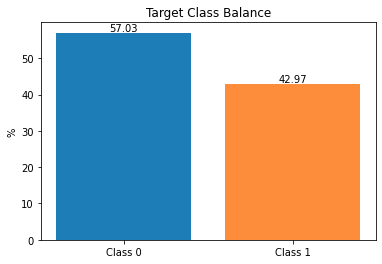



--- 0.30569911003112793 seconds ---


In [6]:
# Plot Bar Plot of Target Class

# start time to measure the time of the program execution
start_time = time.time()

plt.figure(figsize=(10,10))
fig, ax = plt.subplots()

# creating the dataset
data = {'Class 0': round(perc_0*100, 2), 'Class 1': round(perc_1*100, 2)}
classes = list(data.keys())
values = list(data.values())

cmap_blue = plt.cm.get_cmap('GnBu')
blue = cmap_blue(0.8)

cmap_org = plt.cm.get_cmap('Oranges')
orange = cmap_org(0.5)

p1 = ax.bar(classes, values, color=[blue, orange])
ax.set_ylabel('%')
ax.set_title('Target Class Balance')
ax.set_xticks(classes)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

### __EDA - Exploratory Data Analysis__

#### __Check Variable Values__

In [7]:
train_df['keyword'].value_counts()
train_df['location'].value_counts()

print(f"\nkeyword: {train_df['keyword'].nunique()} | {train_df['keyword'].unique()}")
print(f"\nlocation: {train_df['location'].nunique()} | {train_df['location'].unique()}")

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64


keyword: 221 | [nan 'ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonation' 'devastated'
 'devastation' 'disaster' 'd

### __Data Preprocessing__

#### Text Cleaning

- Tokenization
- Stopwords cleaning
- Removing punctuation
- Normalizing
- Stemming

#### __Reference Links:__
> - https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python
> - https://goodboychan.github.io/python/datacamp/natural_language_processing/2020/07/17/04-TF-IDF-and-similarity-scores.html
> - https://notebook.community/ianozsvald/word2vec_sentences_vs_target_sentence_demo/word2vec%20similarity%20example

In [8]:
# function for removing any url within string
def remove_url(text):
    
    text1 = re.sub(r'^https?:\/\/.', '', text, flags=re.MULTILINE)
    text2 = re.sub(r'^http:\/\/.', '', text1, flags=re.MULTILINE)
    text3 = re.sub(r'.http:\/\/.', ' ', text2, flags=re.MULTILINE)
    text4 = re.sub(r'.https?:\/\/.', ' ', text3, flags=re.MULTILINE)
    
    return text4

In [9]:
# quick test for the function 'remove_url()'
text1 = train_df['text'][7610]
text2 = train_df['text'][677]
text3 = train_df['text'][70]

text1
text2
text3

print('\n')
remove_url(text1)
remove_url(text2)
remove_url(text3)

'M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ'

"https://t.co/WKv8VqVkT6 #ArtisteOfTheWeekFact say #Conversations by #coast2coastdjs agree @Crystal_Blaz 's #Jiwonle is a #HipHop #ClubBanger"

'http://t.co/GKYe6gjTk5 Had a #personalinjury accident this summer? Read our advice &amp; see how a #solicitor can help #OtleyHour'

'M1.94 [01:04 UTC]?5km S of Volcano Hawaii. .co/zDtoyd8EbJ'

".co/WKv8VqVkT6 #ArtisteOfTheWeekFact say #Conversations by #coast2coastdjs agree @Crystal_Blaz 's #Jiwonle is a #HipHop #ClubBanger"

'.co/GKYe6gjTk5 Had a #personalinjury accident this summer? Read our advice &amp; see how a #solicitor can help #OtleyHour'

In [10]:
# function that splits a sentence to a list of words
def words_split(text):
    # split into words by white space
    words = text.split()
    
    return words

In [11]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [12]:
# function for removing punctuations
def remove_punc(words):

    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped_words = [w.translate(table) for w in words]
    
    return stripped_words

In [13]:
# function for normalizing texts
def normalize(words):

    # convert to lower case
    words = [word.lower() for word in words]
    
    return words

In [14]:
!pip install unidecode

In [15]:
import unidecode
s = u'Ábcdêãçoàúü'
n = 'Ábcdêãçoàúü'
unidecode.unidecode(s)
unidecode.unidecode(n)

'Abcdeacoauu'

'Abcdeacoauu'

In [16]:
# function for removing stop words
def remove_unicode(words):

    words = [unidecode.unidecode(w) for w in words]
    
    return words

In [17]:
import re
s = "There are only 4 classes left."
re.sub(r'\d+', '', s)

'There are only  classes left.'

In [18]:
# function for removing numbers
def remove_numbers(words):

    words = [re.sub(r'\d+', '', w) for w in words]
    
    return words

In [19]:
!pip install pattern

In [21]:
from pattern.en import suggest

suggest(u'caar')
suggest(u'mussage')
suggest(u'survice')
suggest(u'hte')
suggest(u"wisky")

[('car', 0.5), ('czar', 0.42857142857142855), ('saar', 0.07142857142857142)]

[('message', 0.6216216216216216), ('massage', 0.3783783783783784)]

[('service', 0.9253112033195021), ('survive', 0.07468879668049792)]

[('the', 0.8653201565642368),
 ('he', 0.13408515883485067),
 ('ate', 0.00022706139307570876),
 ('hate', 0.0002162489457863893),
 ('hue', 0.00012974936747183358),
 ('te', 1.0812447289319465e-05),
 ('htm', 1.0812447289319465e-05)]

[('whisky', 0.9333333333333333), ('risky', 0.06666666666666667)]

In [22]:
suggest(u'caar')[0][0]
w = 'mussage'
suggest(w)[0][0]

'car'

'message'

In [23]:
# function for spelling check
def spell_check(words):

    words = [suggest(w)[0][0] for w in words]
    
    return words

In [24]:
# function for removing stop words
def remove_stopwords(words):

    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    
    return words

In [25]:
# function for lemmatizing texts
def lemmatize(words):

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return words

In [26]:
# function:
def stem_text(words):

    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in words]
    
    return stemmed

In [27]:
# function for preprocessing all the steps above
def preprocess_all(text):
    
    no_url = remove_url(text)
    words = words_split(no_url)
    no_numbers = remove_numbers(words)
    no_unicode = remove_unicode(no_numbers)
    words_no_punc = remove_punc(no_unicode)
    words_normalized = normalize(words_no_punc)
    #words_spellchecked = spell_check(words_normalized)
    no_stop__words = remove_stopwords(words_normalized)
    lemmatized = lemmatize(no_stop__words)
    words_no_punc2 = remove_punc(lemmatized)
    sentence = " ".join(words_no_punc2)
    sentence = " ".join(sentence.split())
    #preprocessed_words = stem_text(lemmatized)
    
    return sentence

In [28]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

quick_test = [preprocess_all(data) for data in train_df['text'][65:72]]
quick_test

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

['nxwestmidlands huge fire wholesale market ablaze corwzbfvnxer',
 'ablaze time talk go dont know make due work',
 'cant kid cuz got bicycle accident amp split testicle impossible kid michael father',
 'accident w nashvilletraffic traffic moving slower usual coghkegj',
 'accident center lane blocked santaclara u nb great america pkwy bayarea traffic copmlohzurwr',
 'cogkyegjtk personalinjury accident summer read advice amp see solicitor help otleyhour',
 'stlouis caraccidentlawyer speeding among top cause teen accident cokzomof coskxvmcba car accident teeu']

In [29]:
# Preprocess train_df

# start time to measure the time of the program execution
start_time = time.time()

train_df['text_preprocessed'] = train_df['text'].apply(preprocess_all)

# check
train_df.info()
train_df

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 7613 non-null   int64 
 1   keyword            7552 non-null   object
 2   location           5080 non-null   object
 3   text               7613 non-null   object
 4   target             7613 non-null   int64 
 5   text_preprocessed  7613 non-null   object
dtypes: int64(2), object(4)
memory usage: 357.0+ KB


,id,keyword,location,text,target,text_preprocessed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,two giant crane holding bridge collapse nearby...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary thetawniest control wild fire calif...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,utckm volcano hawaii cozdtoydebj
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,police investigating ebike collided car little...




--- 25.033129930496216 seconds ---


In [30]:
# Preprocess test_df

# start time to measure the time of the program execution
start_time = time.time()

test_df['text_preprocessed'] = test_df['text'].apply(preprocess_all)

# check
test_df.info()
test_df

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 3263 non-null   int64 
 1   keyword            3237 non-null   object
 2   location           2158 non-null   object
 3   text               3263 non-null   object
 4   text_preprocessed  3263 non-null   object
dtypes: int64(1), object(4)
memory usage: 127.6+ KB


,id,keyword,location,text,text_preprocessed
0,0,NaN,NaN,Just happened a terrible car crash,happened terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles uo safety fasten...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,storm ri worse last hurricane cityampothers ha...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago coutbxlcbiuy
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issue hazardous weather outlook hwo coxrbqjhn




--- 10.601767539978027 seconds ---


In [31]:
# export to csv for further manual preprocessing
train_df.to_csv('../data/preprocessed_train_data.csv', index=False)
test_df.to_csv('../data/preprocessed_test_data.csv', index=False)

In [32]:
# import manually preprocessed train_df
train_df = pd.read_csv('../data/preprocessed_manual_train_data.csv')
train_df = train_df.drop(['Unnamed: 0'], axis=1)
train_df.info()
train_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 7613 non-null   int64 
 1   keyword            7552 non-null   object
 2   location           5080 non-null   object
 3   text               7613 non-null   object
 4   target             7613 non-null   int64 
 5   text_preprocessed  7613 non-null   object
dtypes: int64(2), object(4)
memory usage: 357.0+ KB


,id,keyword,location,text,target,text_preprocessed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,two giant crane holding bridge collapse nearby...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary tawniest control wild fire californ...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,volcano hawaii
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,police investigating ebike collided car little...


In [67]:
# import manually preprocessed test_df
test_df = pd.read_csv('../data/preprocessed_manual_test_data.csv')
test_df.info()
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 3263 non-null   int64 
 1   keyword            3237 non-null   object
 2   location           2158 non-null   object
 3   text               3263 non-null   object
 4   text_preprocessed  3262 non-null   object
dtypes: int64(1), object(4)
memory usage: 127.6+ KB


,id,keyword,location,text,text_preprocessed
0,0,NaN,NaN,Just happened a terrible car crash,happened terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles uo safety fasten...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,storm ri worse last hurricane cityampothers ha...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago coutbxlcbiuy
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issue hazardous weather outlook hwo coxrbqjhn


In [33]:
# fill missing data (NaN) with "None" - train_df
train_df['keyword'] = train_df['keyword'].fillna("None")
train_df['location'] = train_df['location'].fillna("None")
train_df

,id,keyword,location,text,target,text_preprocessed
0,1,None,None,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u
1,4,None,None,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,None,None,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...
3,6,None,None,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,7,None,None,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...
...,...,...,...,...,...,...
7608,10869,None,None,Two giant cranes holding a bridge collapse int...,1,two giant crane holding bridge collapse nearby...
7609,10870,None,None,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary tawniest control wild fire californ...
7610,10871,None,None,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,volcano hawaii
7611,10872,None,None,Police investigating after an e-bike collided ...,1,police investigating ebike collided car little...


In [68]:
# fill missing data (NaN) with "None" - test_df
test_df['keyword'] = test_df['keyword'].fillna("None")
test_df['location'] = test_df['location'].fillna("None")
test_df

,id,keyword,location,text,text_preprocessed
0,0,None,None,Just happened a terrible car crash,happened terrible car crash
1,2,None,None,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...
2,3,None,None,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...
3,9,None,None,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire
4,11,None,None,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan
...,...,...,...,...,...
3258,10861,None,None,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles uo safety fasten...
3259,10865,None,None,Storm in RI worse than last hurricane. My city...,storm ri worse last hurricane cityampothers ha...
3260,10868,None,None,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago coutbxlcbiuy
3261,10874,None,None,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issue hazardous weather outlook hwo coxrbqjhn


In [69]:
test_df.isnull().sum()

id                   0
keyword              0
location             0
text                 0
text_preprocessed    1
dtype: int64

In [70]:
test_df['text_preprocessed'] = test_df['text_preprocessed'].fillna("None")
test_df.isnull().sum()
test_df

id                   0
keyword              0
location             0
text                 0
text_preprocessed    0
dtype: int64

,id,keyword,location,text,text_preprocessed
0,0,None,None,Just happened a terrible car crash,happened terrible car crash
1,2,None,None,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...
2,3,None,None,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...
3,9,None,None,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire
4,11,None,None,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan
...,...,...,...,...,...
3258,10861,None,None,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles uo safety fasten...
3259,10865,None,None,Storm in RI worse than last hurricane. My city...,storm ri worse last hurricane cityampothers ha...
3260,10868,None,None,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago coutbxlcbiuy
3261,10874,None,None,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issue hazardous weather outlook hwo coxrbqjhn


In [36]:
# test removing specific words - 'im', 'u' and 'amp':
text = train_df['text_preprocessed'][64]
words = text.split()
words
words = ['' if w == 'u' else w for w in words]
words = ['' if w == 'im' else w for w in words]
words = ['' if w == 'amp' else w for w in words]
words

['nowplaying',
 'rene',
 'ablaze',
 'amp',
 'ian',
 'buff',
 'magnitude',
 'coavjsjfftc',
 'edm']

['nowplaying',
 'rene',
 'ablaze',
 '',
 'ian',
 'buff',
 'magnitude',
 'coavjsjfftc',
 'edm']

In [37]:
# function for removing 'im', 'u', 'amp' and 'rt':
def remove_specificWords(words):

    words = ['' if w == 'u' else w for w in words]
    words = ['' if w == 'im' else w for w in words]
    words = ['' if w == 'amp' else w for w in words]
    words = ['' if w == 'rt' else w for w in words]
    
    return words

In [38]:
# function for preprocessing again
def preprocess_again(text):
    
    words = words_split(text)
    no_specific = remove_specificWords(words)
    
    sentence = " ".join(no_specific)
    sentence = " ".join(sentence.split())
    
    return sentence

In [56]:
# Preprocess quora question 1

# start time to measure the time of the program execution
start_time = time.time()

train_df['text_preprocessed_2nd'] = train_df['text_preprocessed'].apply(preprocess_again)

# check
train_df.info()
train_df

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     7613 non-null   int64 
 1   keyword                7613 non-null   object
 2   location               7613 non-null   object
 3   text                   7613 non-null   object
 4   target                 7613 non-null   int64 
 5   text_preprocessed      7613 non-null   object
 6   text_preprocessed_2nd  7613 non-null   object
dtypes: int64(2), object(5)
memory usage: 416.5+ KB


,id,keyword,location,text,target,text_preprocessed,text_preprocessed_2nd
0,1,None,None,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,deed reason earthquake may allah forgive
1,4,None,None,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,5,None,None,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...,resident asked shelter place notified officer ...
3,6,None,None,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,people receive wildfire evacuation order calif...
4,7,None,None,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...,got sent photo ruby alaska smoke wildfire pour...
...,...,...,...,...,...,...,...
7608,10869,None,None,Two giant cranes holding a bridge collapse int...,1,two giant crane holding bridge collapse nearby...,two giant crane holding bridge collapse nearby...
7609,10870,None,None,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary tawniest control wild fire californ...,ariaahrary tawniest control wild fire californ...
7610,10871,None,None,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,volcano hawaii,volcano hawaii
7611,10872,None,None,Police investigating after an e-bike collided ...,1,police investigating ebike collided car little...,police investigating ebike collided car little...


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3262 entries, 0 to 3262
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     3262 non-null   int64 
 1   keyword                3262 non-null   object
 2   location               3262 non-null   object
 3   text                   3262 non-null   object
 4   text_preprocessed      3262 non-null   object
 5   text_preprocessed_2nd  3262 non-null   object
dtypes: int64(1), object(5)
memory usage: 178.4+ KB


,id,keyword,location,text,text_preprocessed,text_preprocessed_2nd
0,0,None,None,Just happened a terrible car crash,happened terrible car crash,happened terrible car crash
1,2,None,None,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...,heard earthquake different city stay safe ever...
2,3,None,None,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...,forest fire spot pond goose fleeing across str...
3,9,None,None,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire,apocalypse lighting spokane wildfire
4,11,None,None,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan,typhoon soudelor kill china taiwan
...,...,...,...,...,...,...
3258,10861,None,None,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles uo safety fasten...,earthquake safety los angeles uo safety fasten...
3259,10865,None,None,Storm in RI worse than last hurricane. My city...,storm ri worse last hurricane cityampothers ha...,storm ri worse last hurricane cityampothers ha...
3260,10868,None,None,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago coutbxlcbiuy,green line derailment chicago coutbxlcbiuy
3261,10874,None,None,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issue hazardous weather outlook hwo coxrbqjhn,meg issue hazardous weather outlook hwo coxrbqjhn




--- 15.086369514465332 seconds ---


In [71]:
test_df['text_preprocessed_2nd'] = test_df['text_preprocessed'].apply(preprocess_again)
test_df.info()
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     3263 non-null   int64 
 1   keyword                3263 non-null   object
 2   location               3263 non-null   object
 3   text                   3263 non-null   object
 4   text_preprocessed      3263 non-null   object
 5   text_preprocessed_2nd  3263 non-null   object
dtypes: int64(1), object(5)
memory usage: 153.1+ KB


,id,keyword,location,text,text_preprocessed,text_preprocessed_2nd
0,0,None,None,Just happened a terrible car crash,happened terrible car crash,happened terrible car crash
1,2,None,None,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...,heard earthquake different city stay safe ever...
2,3,None,None,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...,forest fire spot pond goose fleeing across str...
3,9,None,None,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire,apocalypse lighting spokane wildfire
4,11,None,None,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan,typhoon soudelor kill china taiwan
...,...,...,...,...,...,...
3258,10861,None,None,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles uo safety fasten...,earthquake safety los angeles uo safety fasten...
3259,10865,None,None,Storm in RI worse than last hurricane. My city...,storm ri worse last hurricane cityampothers ha...,storm ri worse last hurricane cityampothers ha...
3260,10868,None,None,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago coutbxlcbiuy,green line derailment chicago coutbxlcbiuy
3261,10874,None,None,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issue hazardous weather outlook hwo coxrbqjhn,meg issue hazardous weather outlook hwo coxrbqjhn


In [ ]:
# export to csv for record
train_df.to_csv('../data/preprocessed2nd_train_data.csv', index=False)

In [72]:
# export to csv for record
test_df.to_csv('../data/preprocessed2nd_test_data.csv', index=False)

#### __Analyze Text Statistics__
> - Reference Links: 
    * https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
    * https://stackoverflow.com/questions/29216889/slicing-a-dictionary
    * https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
    * https://www.w3resource.com/python-exercises/dictionary/python-data-type-dictionary-exercise-1.php
    * https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
    * https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
    * https://www.analyticsvidhya.com/blog/2021/11/pattern-library-for-natural-language-processing-in-python/
    * https://stackoverflow.com/questions/56611698/pandas-how-to-read-csv-file-from-google-drive-public

<AxesSubplot:>

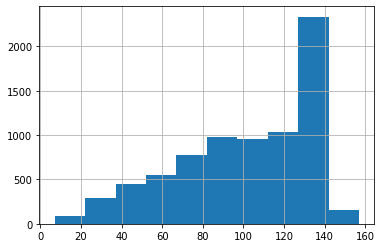

In [58]:
# the number of characters present in each sentence
# rough idea about the text length
train_df['text'].str.len().hist()

twitter text ranges between 10 and 155 characters, heavy concentraion around 130-140 characters.

<AxesSubplot:>

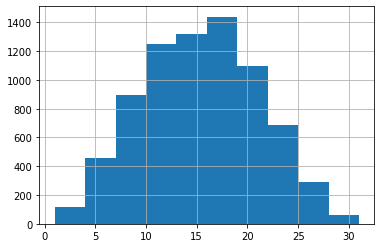

In [59]:
# plot the number of words appearing in each tweet.
train_df['text'].str.split().\
    map(lambda x: len(x)).\
    hist()

twitter text ranges between 2 and 32 words, heavy concentraion around 12-18 words.

<AxesSubplot:>

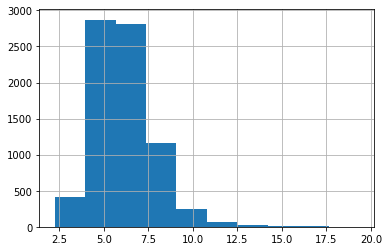

In [60]:
# check the average word length in each sentence.
train_df['text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

the average words of twitter text ranges between 2.5 and 17.5 words, heavy concentraion around 4-8 words.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

{'the': 2575,
 'a': 1845,
 'to': 1805,
 'in': 1757,
 'of': 1722,
 'and': 1302,
 'is': 814,
 'on': 773,
 'that': 492,
 'by': 469,
 'from': 372,
 'are': 345,
 'this': 335,
 'as': 282,
 'so': 239,
 'an': 204,
 'or': 181,
 'all': 178,
 'into': 162,
 'can': 141,
 'now': 101,
 'our': 72,
 'being': 67,
 'other': 31,
 'both': 20}

<Figure size 1008x432 with 0 Axes>

<BarContainer object of 25 artists>

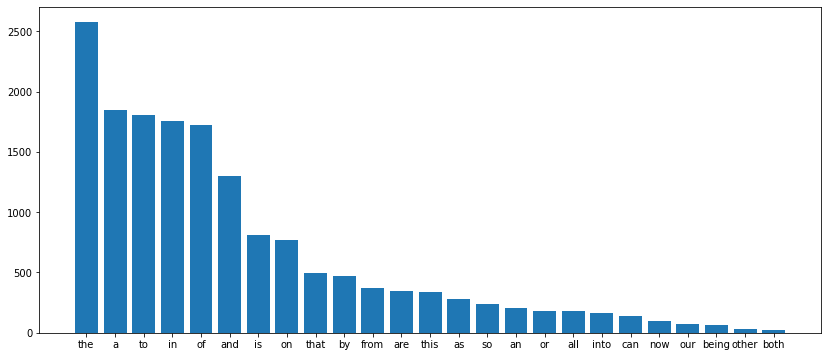



--- 0.4617278575897217 seconds ---


In [61]:
# Analyzing the amount and the types of stopwords for good insights into the data

# start time to measure the time of the program execution
start_time = time.time()

import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))

corpus=[]
new= train_df['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

# slice & sort by values dictionary before plot
import itertools
import operator

dic_sliced = dict(itertools.islice(dic.items(), 25))
dic_sorted = dict( sorted(dic_sliced.items(), key=operator.itemgetter(1), reverse=True))
dic_sorted

# plot bar graph
# function to add value labels
#def addlabels(x,y):
#    for i in range(len(x)):
#        plt.text(i, y[i], y[i], ha = 'center')
        
plt.figure(figsize=(14, 6))
plt.bar(dic_sorted.keys(), dic_sorted.values())
# calling the function to add value labels
#addlabels(dic_sorted.keys(), dic_sorted.values())
plt.show()        
# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

[Text(0, 0, '350'),
 Text(0, 0, '347'),
 Text(0, 0, '255'),
 Text(0, 0, '224'),
 Text(0, 0, '220'),
 Text(0, 0, '205'),
 Text(0, 0, '199'),
 Text(0, 0, '197'),
 Text(0, 0, '191'),
 Text(0, 0, '175'),
 Text(0, 0, '174'),
 Text(0, 0, '158'),
 Text(0, 0, '156'),
 Text(0, 0, '150'),
 Text(0, 0, '150'),
 Text(0, 0, '143'),
 Text(0, 0, '140'),
 Text(0, 0, '140'),
 Text(0, 0, '138'),
 Text(0, 0, '132'),
 Text(0, 0, '131'),
 Text(0, 0, '129'),
 Text(0, 0, '129'),
 Text(0, 0, '126'),
 Text(0, 0, '126'),
 Text(0, 0, '124'),
 Text(0, 0, '124'),
 Text(0, 0, '121'),
 Text(0, 0, '121'),
 Text(0, 0, '120'),
 Text(0, 0, '120'),
 Text(0, 0, '119'),
 Text(0, 0, '119'),
 Text(0, 0, '117'),
 Text(0, 0, '116'),
 Text(0, 0, '115'),
 Text(0, 0, '113'),
 Text(0, 0, '112'),
 Text(0, 0, '112'),
 Text(0, 0, '112'),
 Text(0, 0, '111'),
 Text(0, 0, '111'),
 Text(0, 0, '108'),
 Text(0, 0, '107'),
 Text(0, 0, '105'),
 Text(0, 0, '105'),
 Text(0, 0, '103'),
 Text(0, 0, '102'),
 Text(0, 0, '101'),
 Text(0, 0, '100')]



--- 0.3434460163116455 seconds ---


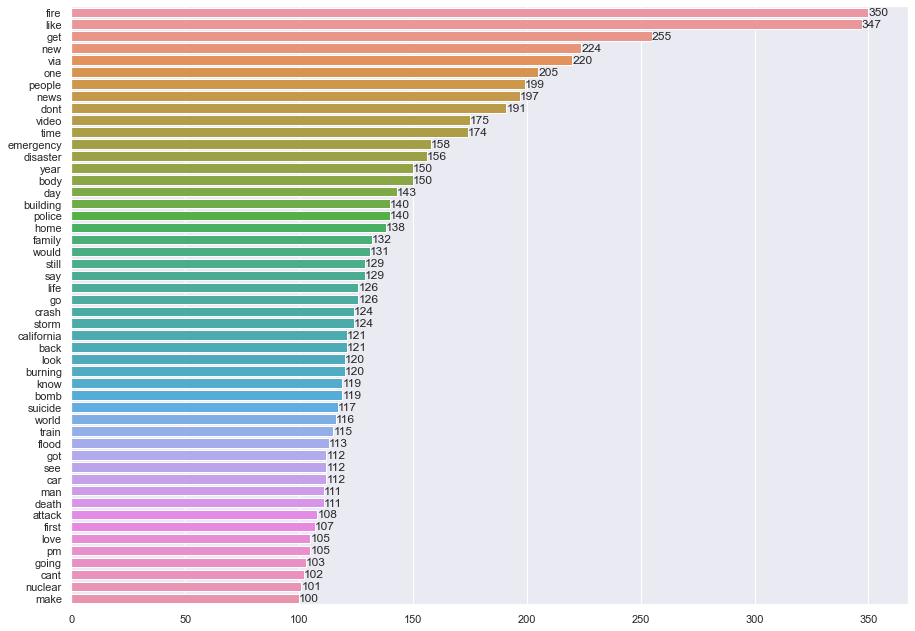

In [62]:
# count the most frequent words other than stop words

# start time to measure the time of the program execution
start_time = time.time()

# Converting to Lowercase
#corpus = [char.lower() for char in corpus]

import collections
from collections import Counter

corpus2=[]
new= train_df['text_preprocessed_2nd'].str.split()
new=new.values.tolist()
corpus2=[word for i in new for word in i]

counter=Counter(corpus2)
most=counter.most_common()

x, y= [], []
for word,count in most[:50]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.set(rc={'figure.figsize':(15,11)})
ax = sns.barplot(x=y,y=x)
ax.bar_label(ax.containers[0])

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

[Text(0, 0, '350'),
 Text(0, 0, '347'),
 Text(0, 0, '255'),
 Text(0, 0, '224'),
 Text(0, 0, '220'),
 Text(0, 0, '205'),
 Text(0, 0, '199'),
 Text(0, 0, '197'),
 Text(0, 0, '191'),
 Text(0, 0, '175')]



--- 0.07382583618164062 seconds ---


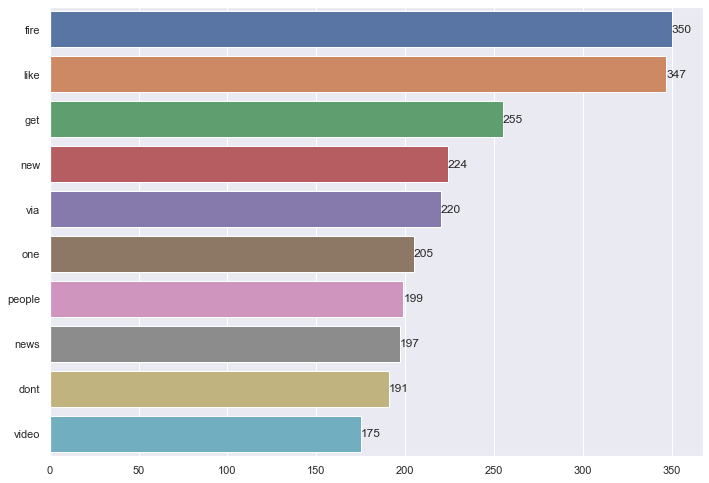

In [63]:
# count the most frequent words other than stop words

# start time to measure the time of the program execution
start_time = time.time()

x1, y1= [], []
for word,count in most[:10]:
    if (word not in stop):
        x1.append(word)
        y1.append(count)

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x=y1,y=x1)
ax.bar_label(ax.containers[0])

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

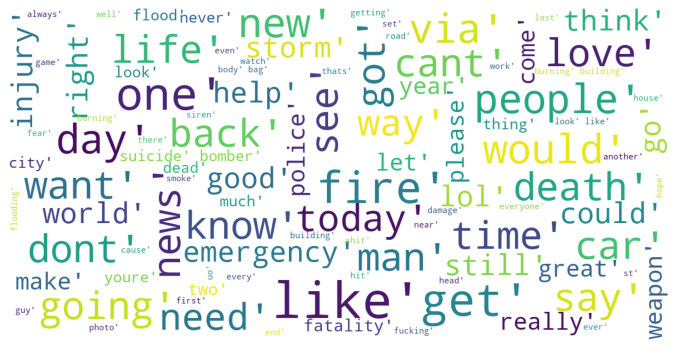



--- 2.3820741176605225 seconds ---


In [64]:
# wordcloud - 'text_preprocessed_2nd' - ALL

# start time to measure the time of the program execution
start_time = time.time()

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus2)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,id,keyword,location,text,target,text_preprocessed,text_preprocessed_2nd
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,bbcmtd wholesale market ablaze colhyxeohyc,bbcmtd wholesale market ablaze colhyxeohyc
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,always try bring heavy metal rt coyaoexngw,always try bring heavy metal coyaoexngw
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,africanbaze breaking newsnigeria flag set abla...,africanbaze breaking newsnigeria flag set abla...
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,cry set ablaze,cry set ablaze
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,plus side look sky last night ablaze coqqsmshajn,plus side look sky last night ablaze coqqsmshajn
...,...,...,...,...,...,...,...
7578,10830,wrecked,None,@jt_ruff23 @cameronhacker and I wrecked you both,0,jtruff cameronhacker wrecked,jtruff cameronhacker wrecked
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0,three day work theyve pretty much wrecked haha...,three day work theyve pretty much wrecked haha...
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0,fx forex trading cramer igers word wrecked dis...,fx forex trading cramer igers word wrecked dis...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0,engineshed great atmosphere british lion gig t...,engineshed great atmosphere british lion gig t...


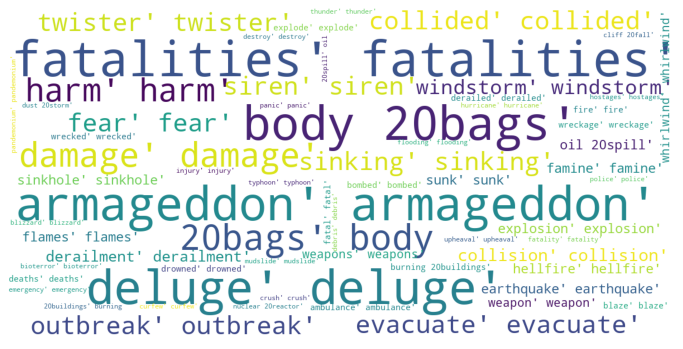



--- 1.7039260864257812 seconds ---


In [65]:
# wordcloud - with 'keywords'

# start time to measure the time of the program execution
start_time = time.time()

# Create copied dataframe and extract rows with missing 'keywords' to be dropped
wordcloud_df = train_df.copy()
drop_data = wordcloud_df[wordcloud_df['keyword'] == 'None']

# Keep only those rows that are not in 'drio_data' dataframe
wordcloud_df = wordcloud_df[~wordcloud_df.id.isin(drop_data.id.tolist())]
wordcloud_df

corpus3=[]
new3= wordcloud_df['keyword'].str.split()
new3=new3.values.tolist()
corpus3=[word for i in new3 for word in i]

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,id,keyword,location,text,target,text_preprocessed,text_preprocessed_2nd
0,1,None,None,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,deed reason earthquake may allah forgive
1,4,None,None,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,5,None,None,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...,resident asked shelter place notified officer ...
3,6,None,None,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,people receive wildfire evacuation order calif...
4,7,None,None,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...,got sent photo ruby alaska smoke wildfire pour...
...,...,...,...,...,...,...,...
7608,10869,None,None,Two giant cranes holding a bridge collapse int...,1,two giant crane holding bridge collapse nearby...,two giant crane holding bridge collapse nearby...
7609,10870,None,None,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary tawniest control wild fire californ...,ariaahrary tawniest control wild fire californ...
7610,10871,None,None,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,volcano hawaii,volcano hawaii
7611,10872,None,None,Police investigating after an e-bike collided ...,1,police investigating ebike collided car little...,police investigating ebike collided car little...


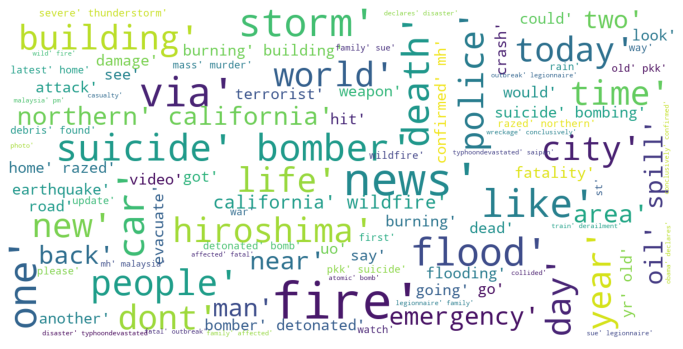



--- 1.9743146896362305 seconds ---


In [66]:
# wordcloud - 'text_preprocessed_2nd' - with disaster tweets only

# start time to measure the time of the program execution
start_time = time.time()

# Create copied dataframe and extract rows with missing 'keywords' to be dropped
wordcloud_df2 = train_df.copy()
drop_data2 = wordcloud_df2[wordcloud_df2['target'] == 0]

# Keep only those rows that are not in 'drio_data' dataframe
wordcloud_df2 = wordcloud_df2[~wordcloud_df2.id.isin(drop_data2.id.tolist())]
wordcloud_df2

corpus4=[]
new4= wordcloud_df2['text_preprocessed_2nd'].str.split()
new4=new4.values.tolist()
corpus4=[word for i in new4 for word in i]

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus4)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")